In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\career_change_prediction_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Field of Study               38444 non-null  object
 1   Current Occupation           38444 non-null  object
 2   Age                          38444 non-null  int64 
 3   Gender                       38444 non-null  object
 4   Years of Experience          38444 non-null  int64 
 5   Education Level              38444 non-null  object
 6   Industry Growth Rate         38444 non-null  object
 7   Job Satisfaction             38444 non-null  int64 
 8   Work-Life Balance            38444 non-null  int64 
 9   Job Opportunities            38444 non-null  int64 
 10  Salary                       38444 non-null  int64 
 11  Job Security                 38444 non-null  int64 
 12  Career Change Interest       38444 non-null  int64 
 13  Skills Gap                   38

In [4]:
df.head()

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,0,0,1,0,2,0,7,1


In [5]:
# Display summary statistics for all numeric columns
df.describe()

,Age,Years of Experience,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000
mean,39.540422,19.548200,5.489673,5.517012,50.308267,114975.623999,5.481896,0.199901,5.520133,0.299943,0.298616,0.149204,0.303975,5.514098,1.003304,5.487904,0.576553
std,11.574509,11.552474,2.870407,2.879007,28.877294,48963.725598,2.870640,0.399931,2.870065,0.458239,0.457657,0.356294,0.459978,2.868188,0.815953,2.857247,0.494111
min,20.000000,0.000000,1.000000,1.000000,1.000000,30005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,30.000000,10.000000,3.000000,3.000000,25.000000,72701.500000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000
50%,40.000000,20.000000,6.000000,6.000000,50.000000,114861.000000,5.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,5.000000,1.000000
75%,50.000000,30.000000,8.000000,8.000000,75.000000,157241.000000,8.000000,0.000000,8.000000,1.000000,1.000000,0.000000,1.000000,8.000000,2.000000,8.000000,1.000000
max,59.000000,39.000000,10.000000,10.000000,100.000000,199996.000000,10.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,10.000000,2.000000,10.000000,1.000000


In [6]:
# Check for missing values
df.isnull().sum()

Field of Study                 0
Current Occupation             0
Age                            0
Gender                         0
Years of Experience            0
Education Level                0
Industry Growth Rate           0
Job Satisfaction               0
Work-Life Balance              0
Job Opportunities              0
Salary                         0
Job Security                   0
Career Change Interest         0
Skills Gap                     0
Family Influence               0
Mentorship Available           0
Certifications                 0
Freelancing Experience         0
Geographic Mobility            0
Professional Networks          0
Career Change Events           0
Technology Adoption            0
Likely to Change Occupation    0
dtype: int64

In [7]:
df.drop('Family Influence', axis=1, inplace=True)

In [8]:
# One-hot encode nominal categorical columns
df = pd.get_dummies(df, columns=['Field of Study', 'Current Occupation', 'Gender'], drop_first=True)

In [9]:
# Label encode ordinal categorical columns
# Define mappings for ordinal categories
education_mapping = {'High School': 0, "Bachelor's": 1, "Master's": 2, 'PhD': 3}
industry_growth_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
family_influence_mapping = {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3}

# Apply mappings
df['Education Level'] = df['Education Level'].map(education_mapping)
df['Industry Growth Rate'] = df['Industry Growth Rate'].map(industry_growth_mapping)

In [10]:
X = df.drop('Likely to Change Occupation', axis=1)  # Features
y = df['Likely to Change Occupation']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize individual classifiers
clf1 = LogisticRegression(max_iter=1000)
clf2 = RandomForestClassifier(n_estimators=100)
clf3 = GradientBoostingClassifier(n_estimators=100)

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gb', clf3)], voting='hard')  # 'hard' for majority class

In [12]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier())])

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3212
           1       1.00      1.00      1.00      4477

    accuracy                           1.00      7689
   macro avg       1.00      1.00      1.00      7689
weighted avg       1.00      1.00      1.00      7689



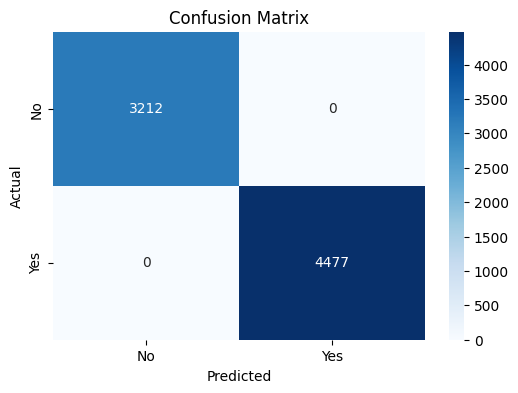

In [13]:
y_pred = voting_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()